# Исследование объявлений о продаже квартир

Мы исследуем архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача исследования - сформировать характеристику типичного объекта продажи, а также выделить факторы, влияющие на его стоимость.


По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Структура исследования

1) <a href='#info1'>Общая информация</a>

- <a href='#info2'>Вывод</a>

2) <a href='#info3'> Предобработка данных </a>

- <a href= '#info4'>Вывод </a>

3) <a href='#info5'>Добавление расчетных данных в таблицу</a>

- <a href='#info6'>Вывод</a>

4) <a href='#info7'>Исследовательский анализ данных</a>

- <a href='#info8'>Исследование цены, числа комнат, высоты потолков, площади</a>
- <a href='#info9'>Исследование сроков продажи квартиры</a>
- <a href='#info10'>Факторы, влияющие на стоимость квартиры</a>
- <a href='#info11'>Данные по 10 лидерам</a>
- <a href='#info12'>Определение центра</a>
- <a href='#info13'>Сравнение показателей по центру и всему г. Санкт-Петербург</a>

5) <a href='#info14'>Итог</a>

Для анализа предоставлены следующие группы данных:
1. Информация о квартире - данные о количестве комнат, площади, высоте потолков и т.п.;
2. Информация о расположении квартиры - расстояние до ближайшего водоёма;
3. Информация об объявлении, размещенном на сайте - число фотографий, дата публикации, длительность размещения объявления.


### Шаг 1. Откройте файл с данными и изучите общую информацию. <a id=info1></a>

In [1]:
import pandas as pd

real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
import matplotlib.pyplot as plt

In [3]:
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Данные по рынку недвижимости представлены в таблице со следующими характеристиками: **23699** записей в **22** столбцах (4 типа данных bool, float, int и object).

Категориальные данные - **locality_name**

Количественные данные - **total_images, last_price, total_area, rooms, ceiling_height, floors_total, living_area, floor, kitchen_area, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, first_day_exposition**

Логические данные - **is_apartment, studio**

Первичный осмотр выявил следующие проблемы:

1. **first_day_exposition** - указан в формате object (необходимо перевести столбец в datetime)
2. Наличие пропусков в столбцах - **ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airport_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition**
(14 столбцов из 22)
3. Выявлено несколько столбцов с несоответствующими типами данных. ('last price', 'floors_total',  'balcony' - для удобства расчетов следует перевести в int, 'is_apartment' - необходимо перевести в формат bool)

Поскольку пропущенных значений в данных много, нужно выяснить их природу и определить степень влияния на итоговый анализ. Рассмотрим таблицу подробнее для выявления скрытых ошибок. Сначала исследуем столбцы, в которых отсутствуют пропуски.

**1)** Рассмотрим столбец 'total_images':

In [4]:
real_estate['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

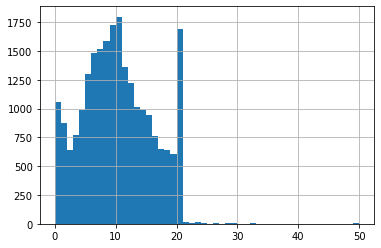

In [5]:
real_estate['total_images'].hist(bins=50)

In [6]:
real_estate.query('total_images == 50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9778,50,11000000.0,87.0,2017-10-25T00:00:00,2,NaN,25.0,32.5,11,NaN,...,31.0,5.0,Санкт-Петербург,9586.0,11649.0,0.0,NaN,0.0,NaN,3.0
12667,50,20500000.0,76.0,2017-12-10T00:00:00,3,NaN,20.0,47.0,16,NaN,...,29.0,NaN,Санкт-Петербург,50812.0,16141.0,0.0,NaN,0.0,NaN,5.0
17396,50,14500000.0,119.7,2017-12-02T00:00:00,4,4.0,4.0,87.5,3,NaN,...,13.5,NaN,Санкт-Петербург,24375.0,2410.0,1.0,551.0,2.0,617.0,106.0


Данные о прикрепленных фотографиях представлены в полном объеме, пропусков в столбце 'total_images' нет. На гистограмме заметно 3 пика значений: 0 (не было предоставлено фотографий), 10 и 20. Судя по пику на 20, можно предположить наличие технического ограничения на количество загрузок.
Также присутствует несколько выбивающихся значений, однако серьёзных отклонений не обнаружено.

**2)** Переходим к рассмотрению 'last_price' 

In [7]:
print('Минимальная цена:', real_estate['last_price'].min())
print('Средняя цена:', real_estate['last_price'].mean())
print('Максимальная цена:', real_estate['last_price'].max())
print('Медианная цена:', real_estate['last_price'].median())

Минимальная цена: 12190.0
Средняя цена: 6541548.771551542
Максимальная цена: 763000000.0
Медианная цена: 4650000.0


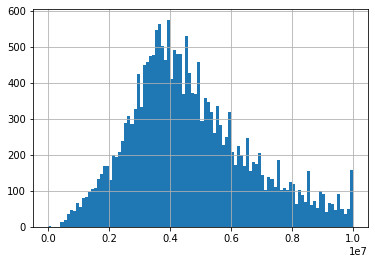

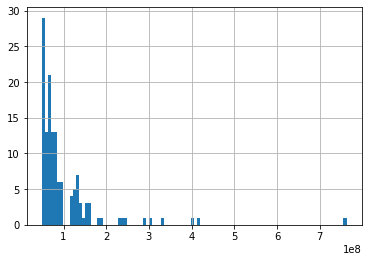

In [8]:
real_estate['last_price'].hist(bins=100, range = (0, 10000000))
plt.show()
real_estate['last_price'].hist(bins=100, range = (50000000, real_estate['last_price'].max()))

In [9]:
real_estate.query('last_price == last_price.max()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


В столбце 'last_price' не обнаружено пропусков и аномальных значений (нулевых, отрицательных). Распределение данных похоже на нормальное. Максимальные значения влияют на среднее, завышая его на 2 млн. по сравненю с медианой.
В целом проблемы с исходными данными отсутствуют.

**3)** Рассмотрим данные по площади квартир в столбце 'total_area'

In [10]:
real_estate['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [11]:
print('Число квартир, площадью больше 100 кв.м.:',real_estate[real_estate['total_area'] > 100]['total_area'].count())
print('Доля квартир, площадью больше 100 кв. м.: {:.2%}'.format(real_estate[real_estate['total_area'] > 100]['total_area'].count()/len(real_estate['total_area'])))

Число квартир, площадью больше 100 кв.м.: 1836
Доля квартир, площадью больше 100 кв. м.: 7.75%


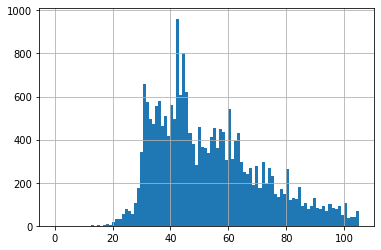

In [12]:
real_estate['total_area'].hist(bins=100, range = (0, 105))

В столбце 'real_estate' не обнаружено пропусков. Доля данных, выбивающихся за Q3*1,5 составляет 7,75%. В выборке присутствует несколько квартир с аномально высокой ценой, однако в целом проблемы с исходными данными отсутствуют.

4) Столбец 'rooms' - количество комнат.

In [13]:
real_estate['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

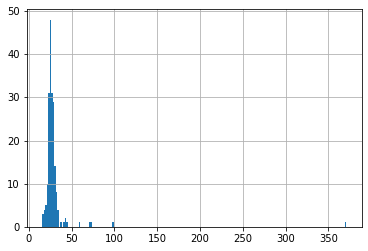

In [14]:
real_estate[real_estate['rooms'] == 0]['total_area'].hist(bins=200)

В данных о количестве комнат (столбец 'rooms'). Основная часть выборки сосредоточена среди значений 1-4, что объясняется спецификой жилого фонда в России.
В 197 случаях появляется значение 0 комнат. При этом большинство таких помещений имеет площадь около 30 кв. м. Возможно, что в подобных жилых помещениях не выделялись отдельные комнаты. Полагаем целесообразным  для дальнейших расчетовперевести их в статус однокомнатных.

5) 'first_day_exposition' - дата размещения объявления на сайте

In [15]:
real_estate['first_day_exposition'].head(10)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object

Столбец 'first_day_exposition' содержит значения в формате object. Для дальнейшего анализа необходимо перевести их в datetime. 

6) Рассмотрим столбцы, в которых содержатся логические данные - 'studio', 'open_plan'

In [16]:
print(real_estate['studio'].unique())
print(real_estate['studio'].value_counts())

[False  True]
False    23550
True       149
Name: studio, dtype: int64


In [17]:
print(real_estate['open_plan'].unique())
print(real_estate['open_plan'].value_counts())

[False  True]
False    23632
True        67
Name: open_plan, dtype: int64


В столбцах 'open_plan', 'studio' проблем не обнаружено.

Перейдём к исследованию данных с пропусками.

### Данные с пропусками

1) Исследуем столбец 'ceiling_height'

In [18]:
real_estate['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [19]:
real_estate[real_estate['ceiling_height'] > 4]['ceiling_height'].value_counts()

4.20      10
27.00      8
25.00      7
4.50       7
8.00       3
4.40       3
4.10       3
5.30       2
4.70       2
4.19       2
4.45       2
32.00      2
4.06       1
4.25       1
24.00      1
26.00      1
5.50       1
4.37       1
5.00       1
14.00      1
10.30      1
20.00      1
6.00       1
8.30       1
100.00     1
4.14       1
4.65       1
5.20       1
4.80       1
4.30       1
5.80       1
22.60      1
5.60       1
4.15       1
4.90       1
27.50      1
Name: ceiling_height, dtype: int64

In [20]:
print('Число пропущенных значений в столбце "ceiling_height"', ':', real_estate['ceiling_height'].isna().sum())
print('Доля пропущенных значений: {:.2%}'.format(real_estate['ceiling_height'].isna().sum()/len(real_estate['ceiling_height'])))

Число пропущенных значений в столбце "ceiling_height" : 9195
Доля пропущенных значений: 38.80%


In [21]:
real_estate[real_estate['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [22]:
real_estate[real_estate['ceiling_height'].isna()]['locality_name'].value_counts()

Санкт-Петербург                                            5617
посёлок Мурино                                              322
посёлок Шушары                                              223
посёлок Парголово                                           190
деревня Кудрово                                             177
                                                           ... 
деревня Нижние Осельки                                        1
деревня Курковицы                                             1
садоводческое некоммерческое товарищество Лесная Поляна       1
поселок Тельмана                                              1
поселок Заводской                                             1
Name: locality_name, Length: 283, dtype: int64

Исследование столбца 'ceiling_height' показало наличие пропусков в 38,8% записей. Предварительный анализ не выявил однозначной связи пропусков с конкретным населённым пунктом (большая часть сосредоточена в Санкт-Петербурге, однако это может быть ложной корелляцией, связанной с распределением количества объявлений по населённым пунктам).
Некоторые значения столбца являются аномально высокими (27, 100, 22.6). Можно предположить, что данные значения - ошибки, возникшие в результате некорректной постановки запятой при ручном вводе. При дальнейшей обработке стоит рассмотреть вариант деления на 10 значений столбца выше 20. 
Для заполнения пропусков предположительно использовать медианные значения по населённому пункту, ориентируясь на особенности жилого фонда в зависимости от территории.

Рассмотрим другие столбцы, в которых пропуски, чтобы определить их долю в общем числе значений:

In [23]:
 lost_values = ['floors_total', 'living_area', 'is_apartment', 'kitchen_area',
                'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
                'ponds_around3000', 'ponds_nearest', 'days_exposition']
#Создаём список столбцов, который пропускаем через цикл, в котором вычисляется количество пропусков 
#и их доля в общем количестве значений
for position in lost_values:
    print('Число пропущенных значений в столбце', position, ':', real_estate[position].isna().sum())
    print('Доля пропущенных значений: {:.2%}'.format(real_estate[position].isna().sum()/len(real_estate[position])))
    print()

Число пропущенных значений в столбце floors_total : 86
Доля пропущенных значений: 0.36%

Число пропущенных значений в столбце living_area : 1903
Доля пропущенных значений: 8.03%

Число пропущенных значений в столбце is_apartment : 20924
Доля пропущенных значений: 88.29%

Число пропущенных значений в столбце kitchen_area : 2278
Доля пропущенных значений: 9.61%

Число пропущенных значений в столбце balcony : 11519
Доля пропущенных значений: 48.61%

Число пропущенных значений в столбце locality_name : 49
Доля пропущенных значений: 0.21%

Число пропущенных значений в столбце airports_nearest : 5542
Доля пропущенных значений: 23.38%

Число пропущенных значений в столбце cityCenters_nearest : 5519
Доля пропущенных значений: 23.29%

Число пропущенных значений в столбце parks_around3000 : 5518
Доля пропущенных значений: 23.28%

Число пропущенных значений в столбце parks_nearest : 15620
Доля пропущенных значений: 65.91%

Число пропущенных значений в столбце ponds_around3000 : 5518
Доля пропущен

- Наибольшая доля пропущенных значений обнаружена в столбце 'is_apartment'. Поскольку данные в столбце представляют собой логические значения, то можно предположить, что отсутствие данных равносильно значению False.

- Далее по количеству пропусков находятся столбцы 'parks_nearest' и 'ponds_nearest' - 65,91% и 61,56% соответственно. Для конкретизации причины пропусков необходимо рассмотреть их распределение по населённым пунктам, поскольку это может быть связано с отсутствием данных о парках и прудах в малых населённых пунктах (сёла, посёлки, пгт).

- Следующий по количеству пропусков - 'balcony' (количество балконов) - 48,61% . Поскольку данный параметр вводился вручную, то, возможно, при отсутствии балкона поле оставалось пустым. Необходимо рассмотреть значения столбца и при отсутствии аномалий указать нулевое значение.

- Также обратим внимание на сходство количества пропусков в столбцах 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000', 'airports_nearest'. Возможно, что данные пропуски объединяет один параметр (предположительно, населённый пункт). Необходимо дальнейшее исследование.

- Схожий процент пропусков заметен в столбцах 'living_area' (8,03%) и 'kitchen_area'(9,61%). Необходимо исследовать возможную связь в данных показателях, а также проверить связь их с иными параметрами. 

Рассмотрим данные далее, чтобы проанализировать варианты предобработки.

In [24]:
real_estate['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [25]:
real_estate[real_estate['floors_total'].isna()]['locality_name'].value_counts()

Санкт-Петербург                    70
Красное Село                        2
поселок Мурино                      2
посёлок Мурино                      2
Кудрово                             2
поселок городского типа Токсово     1
посёлок Бугры                       1
посёлок Стрельна                    1
деревня Новое Девяткино             1
посёлок Щеглово                     1
городской посёлок Новоселье         1
посёлок Шушары                      1
Name: locality_name, dtype: int64

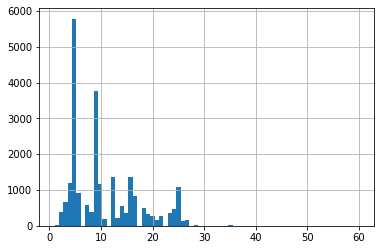

In [26]:
real_estate['floors_total'].hist(bins=70)

In [27]:
real_estate[real_estate['floors_total']> 37]['floors_total'].value_counts()

52.0    1
60.0    1
Name: floors_total, dtype: int64

In [28]:
real_estate[real_estate['floors_total']> 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,...,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


2) В информации о количестве этажей 86 пропусков, большинство из которых относится к помещениям на территории Санкт-Петербурга.
Анализ данных на аномальные значения выявил 2 "выброса" со значением выше 37.
Согласно Википедии, жилое здание Санкт-Петербурга с максимальной этажностью - 37-этажный ЖК "Князь Александр Невский", а в г. Кронштадт нет зданий такой этажности.

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0#cite_note-1

In [29]:
print(real_estate['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]


In [30]:
print(real_estate['is_apartment'].unique())

[nan False True]


3) В столбцах 'balcony' и 'is_apartment', помимо пропущенных значений, не выявлено иных аномалий.

4) Далее иссследуем наличие взаимосвязи в пропущенных значениях 'living_area' и 'kitchen_area'. Возможно, что такие квартиры относятся к помещениям со свободной планировкой и площадь кухни в них не выделяется.

In [31]:
#выводим в отдельную переменную строки, где пересекаются пропуски в размере жилой зоны и кухни
missing_liv_kit = real_estate[(real_estate['living_area'].isna()) 
                              & (real_estate['kitchen_area'].isna())]['last_price'].count()
print('Количество строк, где отсутствует площадь кухни и жилой зоны:',
    missing_liv_kit)
print('Доля таких строк в пропусках жилой зоны: {:.2%}'.format(
    missing_liv_kit/real_estate['living_area'].isna().sum()))
print('Доля таких строк в пропусках кухонной зоны: {:.2%}'.format(
    missing_liv_kit/real_estate['kitchen_area'].isna().sum()))
print('Проверка, являются ли такие квартиры студиями:')
print(real_estate[(real_estate['living_area'].isna()) & (real_estate['kitchen_area'].isna())]['studio'].value_counts())
print('Проверка, имеют ли такие квартиры открытую планировку:')
print(real_estate[(real_estate['living_area'].isna()) & (real_estate['kitchen_area'].isna())]['open_plan'].value_counts())


Количество строк, где отсутствует площадь кухни и жилой зоны: 1464
Доля таких строк в пропусках жилой зоны: 76.93%
Доля таких строк в пропусках кухонной зоны: 64.27%
Проверка, являются ли такие квартиры студиями:
False    1454
True       10
Name: studio, dtype: int64
Проверка, имеют ли такие квартиры открытую планировку:
False    1459
True        5
Name: open_plan, dtype: int64


Как мы видим, есть существенные пересечения между пропущенными значениями по площади кухни и жилой площади, однако такие квартиры не являются студиями, т.е. выдвинутое ранее предположение не подтвердилось.

5) Рассмотрим данные о населённых пунктах.

In [32]:
print('Количество населённых пунктов в базе:', len(real_estate['locality_name'].unique()))
print(real_estate['locality_name'].unique())

Количество населённых пунктов в базе: 365
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеле

Обнаружены дубликаты 'поселок Пансионат Зелёный Бор' и 'посёлок Пансионат Зелёный Бор'. Ошибки возникли в связи с использованием в некоторых записях буквы 'ё'. Для унификации будет целесообразно заменить все ё на е. Это также поможет при группировке по типу населенного пункта.

6) Кратко рассмотрим пропуски в информации о расстоянии до ключевых локаций.

In [33]:
print('Количесто строк с одновременными пропусками "parks_nearest" и "ponds_nearest":',
    real_estate[(real_estate['parks_nearest'].isna()) & (real_estate['ponds_nearest'].isna())]['open_plan'].count())
#print(real_estate[(real_estate['parks_nearest'].isna()) & (real_estate['ponds_nearest'].isna())]['locality_name'].unique())
print('Количесто строк с одновременными пропусками "parks_around3000", "ponds_around3000" и "airports_nearest":',
    real_estate[(real_estate['parks_around3000'].isna()) & (real_estate['ponds_around3000'].isna()) & (real_estate['airports_nearest'].isna())]['open_plan'].count())
print()
print('Населённые пункты с одновременными пропусками "parks_around3000" и "ponds_around3000"')
print(real_estate[(real_estate['parks_around3000'].isna()) & (real_estate['ponds_around3000'].isna()) & (real_estate['airports_nearest'].isna())]['locality_name'].unique())

Количесто строк с одновременными пропусками "parks_nearest" и "ponds_nearest": 11334
Количесто строк с одновременными пропусками "parks_around3000", "ponds_around3000" и "airports_nearest": 5518

Населённые пункты с одновременными пропусками "parks_around3000" и "ponds_around3000"
['городской посёлок Янино-1' 'посёлок Мурино' 'Сертолово'
 'деревня Кудрово' 'Коммунар' 'поселок городского типа Красный Бор'
 'Гатчина' 'поселок Мурино' 'деревня Фёдоровское' 'Выборг' 'Кировск'
 'деревня Новое Девяткино' 'Санкт-Петербург'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'деревня Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'деревня Куттузи' 'посёлок Аннино'
 'поселок городского типа Ефимовский' 'посёлок Плодовое'
 'деревня Заклинье' 'поселок Торковичи' 'поселок Первомайское' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село П

Обнаружено заметное сходство пропусков данных о близости к паркам и прудам. При этом данные о числе парков и водоёмов в радиусе 3км пропущены в одних и тех же строках и почти полностью совпадают с пропусками в данных по близости к аэропорту.
При этом проверка не выявила очевидной связи пропусков с видом населённого пункта (пропуски обнаружены не только в посёлках, но и городах).

In [34]:
real_estate['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

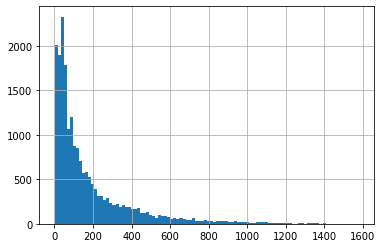

In [35]:
real_estate['days_exposition'].hist(bins = 100)

7) Оценка значений в столбце 'days_exposition' показала, что распределение значений приближено к распределнию Пуассона. Заметных аномалий не выявлено.
Заполнение пропусков стоит рассматривать после корректировки типа данных в столбце 'first_day_exposition'.

### Вывод <a id=info2></a>

В ходе первичного анализа данных об объявлениях о продаже недвижимости было выявлено следующее:
 - Размерность фрейма - 22 столбца и 23699 строк
 - в 14 столбцах есть пропущенные значения
 
**Отсутствуют ошибки в данных**
- 'total_images' - количество прикреплённых фотографий
- 'last_price' - цена продажи
- 'studio' - "является ли квартира студией"
- 'open_plan' - "имеет ли квартира свободную планировку"

**Незначительные ошибки в данных**
- 'locality_name' - наименование населённого пункта - 49 пропущенных значений, необходимо заменить ё на е для сокращения дубликатов.
- 'floors_total' - количество этажей в доме - 86 пропущенных значений, 2 аномально высоких.
- - 'rooms' - количество комнат - 197 нулевых значений. Возможно, что количество комнат не было указано из-за малой площади помещения.

**Значимые ошибки в данных**
- 'is_apartment', 'balcony' - большое количество пропущенных значений, которые возможно заменить на 0 или False
- 'days_exposition' - 13,4% пропущенных значений. С большой вероятностью их можно восстановить, ориентируясь на столбец 'first_day_exposition'
- 'first_day_exposition' - отсутствуют пропущенне значения, однако тип данных необходимо привести в datetime
- 'living_area', 'kitchen_area' - 1903 и 2278 пропусков соответственно, 1464 из которых находятся в одних и тех же строках.

**Критические ошибки в данных**

- 'ceiling_height' - 38% пропущенных данных. Возможно восстановить по медиане жилого фонда в зависимости от населённого пункта.
- Столбцы 'parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000', 'cityCenters_nearest' - большое количество пропущенных значений, пересекающихся между собой. Предположительно, возможно частично восстановить значения медианными данными по населенным пунктам. 

Основные цели предобработки данных:

1) Изменение типа данных в столбцах 'is_apartment', 'last price', 'floors_total',  'balcony'.

2) Замена букв ё в названии локации для удобства последующей группировки

3) Замена пропусков в 'is_apartment', 'balcony' на нулевые значения

4) Восстановление пропусков в 'first_day_exposition'

5) Заполнение пропусков в столбцах 'living_area', 'kitchen_area', 'rooms'

6) Заполнение пропусков в столбцах 'ceiling_height', 'parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000', 'cityCenters_nearest'

### Шаг 2. Предобработка данных <a id=info3></a>

1) Для подготовки к последующему преобразованию типов заполним пропуски, происхождение которых представляется наиболее очевидным - столбцы 'is_apartment' и 'balcony'. Предварительный анализ информации позволил сделать предположение, что данные поля могли оказаться незаполненными, так как пользователь не видел необходимости указывать нулевые значения.
Заполним пропуски False и 0 соответственно.

In [36]:
#заполнение пропусков нулевыми значениями в соответствии с типом данных в столбце
print('Число пропусков в "is_apartment" до обработки:', real_estate['is_apartment'].isna().sum())
print('Число пропусков в "balcony" до обработки:', real_estate['balcony'].isna().sum())
real_estate['is_apartment'] = real_estate['is_apartment'].fillna(False)
real_estate['balcony'] = real_estate['balcony'].fillna(0)
print('Число пропусков в "is_apartment" после обработки:', real_estate['is_apartment'].isna().sum())
print('Число пропусков в "balcony" после обработки:', real_estate['balcony'].isna().sum())

Число пропусков в "is_apartment" до обработки: 20924
Число пропусков в "balcony" до обработки: 11519
Число пропусков в "is_apartment" после обработки: 0
Число пропусков в "balcony" после обработки: 0


In [37]:
print(real_estate['is_apartment'].unique())
print(real_estate['balcony'].unique())

[False  True]
[0. 2. 1. 5. 4. 3.]


Пропуски заполнены.

2) Переведем 'first_day_exposition' в формат datetime. Дата в столбце представлена в формате YYYY-mm-DDTHH:MM:SS

In [38]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [39]:
real_estate['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Дата приведена к удобному длядальнейшего анализа виду.

3) Произведём замену ё на е в столбце 'locality_name', избавляясь таким образом от возможных дубликатов в названиях населённых пунктов.

In [40]:
print('Количество населённых пунктов в базе до замены:', len(real_estate['locality_name'].unique()))
#заменяем ё на е во всех значениях строковой переменной
real_estate['locality_name'] = real_estate['locality_name'].str.replace('ё', 'е')
print('Количество населённых пунктов в базе после замены:', len(real_estate['locality_name'].unique()))
#print(real_estate['locality_name'].unique())

Количество населённых пунктов в базе до замены: 365
Количество населённых пунктов в базе после замены: 331


Количество населённых пунктов в базе сократилось с 365 до 331, т.е. 34 названия были дубликатами, отличающимися только наличием буквы ё.

В столбце пропущено 86 значений. 

Распределение квартир c пропусками локации по площади


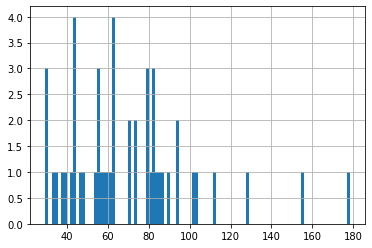

Распределение квартир c пропусками локации по цене


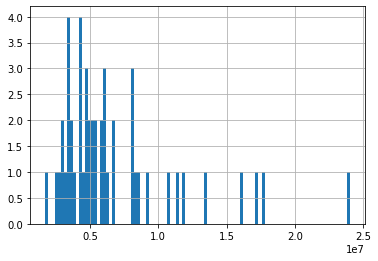

In [41]:
print('Распределение квартир c пропусками локации по площади')
real_estate[real_estate['locality_name'].isna()]['total_area'].hist(bins = 100, label = (''))
plt.show()
print('Распределение квартир c пропусками локации по цене')
real_estate[real_estate['locality_name'].isna()]['last_price'].hist(bins = 100)

86 значений составляет 0,4% от общей выборки. Данное значение не является статистически значимым. Поскольку в дальнейшем в расчетах будут использоваться медианные значения по населённым пунктам и региону в целом, полагаем целесообразным **удалить данные строки из выборки**.
Распределение по цене и площади не показывает существенного перекоса в распределении значений.

In [42]:
real_estate.dropna(subset = ['locality_name'], inplace = True)

In [43]:
real_estate = real_estate.reset_index(drop = True)
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_ar

После удаления строк с пропусками в таблице осталось 23650 значений. 

4) Рассмотрим пропуски в столбце 'ceiling_height'. В отсутствие данных о дате постройки будем ориентироваться на то, что в населённых пунктах основная часть жилого фонда обладает схожими характеристиками в части высоты потолков. Поскольку в данных были обнаружены выбросы, влияющие на выбросы, возьмём медианную высоту потолков в населённых пунктах с пропусками. 

In [44]:
print('Количество пропусков до обработки:', real_estate['ceiling_height'].isna().sum())
#выбираем все названия населённых пунктов, где есть пропуски по высоте потолков
missing_ceiling_town = real_estate[real_estate['ceiling_height'].isna()]['locality_name'].unique()
#создаём переменную med_ceil, которая каждому из населённых пунктов будет ставить в соответствие медианную высоту потолка
for town in missing_ceiling_town:
    med_ceil = round(real_estate.loc[real_estate['locality_name'] == town, 'ceiling_height'].median(), 2)
    print(town, med_ceil)
    #заменяем пустые значения в ячейках
    real_estate.loc[(real_estate['locality_name'] == town) & (real_estate['ceiling_height'].isna()), 'ceiling_height'] = med_ceil
    


Количество пропусков до обработки: 9160
поселок Шушары 2.63
Санкт-Петербург 2.7
городской поселок Янино-1 2.65
поселок Парголово 2.64
поселок Мурино 2.7
Ломоносов 2.55
Сертолово 2.6
Пушкин 2.6
Коммунар 2.56
Колпино 2.5
Гатчина 2.55
Кировск 2.5
поселок Металлострой 2.5
поселок городского типа Лебяжье 2.5
поселок Молодцово 2.5
поселок городского типа Кузьмоловский 2.51
Выборг 2.55
деревня Пикколово nan
поселок Аннино 2.55
поселок городского типа Ефимовский 2.65


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


поселок Плодовое 2.5
деревня Заклинье nan
Сясьстрой 2.55
Павловск 2.6
Всеволожск 2.7
Сланцы 2.5
Мурино 2.7
Ивангород 2.52
Кингисепп 2.5
Петергоф 2.55
поселок Новый Свет 2.65
Сестрорецк 2.7
деревня Кудрово 2.75
деревня Новое Девяткино 2.7
поселок Романовка 2.6
поселок Бугры 2.6
Сосновый Бор 2.5
Отрадное 2.55
село Павлово 2.75
село Копорье 2.5
Волосово 2.5
Красное Село 2.6
поселок Стрельна 2.55
Бокситогорск 3.9
Кронштадт 2.55
Пикалево 2.6
Кудрово 2.73
поселок Терволово 2.55
Кириши 2.5
Подпорожье 2.55
поселок городского типа Сиверский 2.55
поселок Сельцо 2.55
поселок городского типа Вырица 2.55
деревня Кипень 2.55
поселок Севастьяново nan
Тихвин 2.6
деревня Лопухинка 2.6
поселок Новогорелово 2.65
городской поселок Лесогорский 2.55
деревня Лаголово 2.5
Тосно 2.5
Никольское 2.56
городской поселок Новоселье 2.8
деревня Большие Колпаны 2.5
деревня Иссад nan
поселок городского типа Токсово 2.6
поселок Тельмана 2.5
Приморск 2.5
поселок Понтонный 2.58
Новая Ладога 2.5
Шлиссельбург 2.5
деревня Пу

In [45]:
print('Количество пропусков после обработки:', real_estate['ceiling_height'].isna().sum())

Количество пропусков после обработки: 106


Поскольку после обработки осталось 106 пустых значений заполним их медианной высотой потолков по региону.

In [46]:
#задаём переменную, принимающую значения медианы, рассчитанной для всех непустых значений
median_height = real_estate[real_estate['ceiling_height'].isna() == False]['ceiling_height'].median()
print('Высота потолка для заполнения:',median_height)
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(median_height)

Высота потолка для заполнения: 2.7


In [47]:
print('Количество пропусков после обработки:', real_estate['ceiling_height'].isna().sum())

Количество пропусков после обработки: 0


Значения по высоте потолков заполнены.

5) Нулевые значения в столбце 'rooms'. Проверим характеристики данных пропусков

In [48]:
print(real_estate[real_estate['rooms']==0]['studio'].value_counts())
print(real_estate[real_estate['rooms']==0]['open_plan'].value_counts())

True     138
False     59
Name: studio, dtype: int64
False    138
True      59
Name: open_plan, dtype: int64


In [49]:
print(real_estate[(real_estate['rooms']==0) &(real_estate['total_area'] < 30)]['total_area'].count())

161


Поскольку большая часть помещений с 0 комнат является студиями или является квартирами со свободной планировкой и имеет маленькую площадь, считаем возможность заменить количество комнат с 0 на 1.

In [50]:
real_estate.loc[real_estate['rooms'] ==0, 'rooms'] = 1
print('Количество квартир с 0 комнат после обработки:', real_estate[real_estate['rooms'] ==0]['rooms'].count())

Количество квартир с 0 комнат после обработки: 0


6)Заполнение данных по размеру жилой зоны и зоны кухни (8% и 9% пропусков) вычислим долю этих зон от общей площади для существующих значений.

Произведём расчёт доли жилой и кухонной площади в квартире в зависимости от числа комнат, балконов (они входят в общую площадь и потому могут влиять на соотношение) и наличие у квартиры типа "студия". Для всех значений площади возьмём медианные значения.

In [51]:
#построим сводную таблицу, взяв за индексы число комнат,количество балконов и тот факт, является ли квартира студией
living_research = pd.pivot_table(real_estate ,index = ['rooms', 'studio', 'balcony'],
                                 values = ['living_area', 'kitchen_area', 'total_area'],
                                 aggfunc = 'median')
#Создаём два новых столбца, вычисляющих, какую долю от площади составляют кухня и жилая зона
living_research['living_rate'] = living_research['living_area']/living_research['total_area']
living_research['kitchen_rate'] = living_research['kitchen_area']/living_research['total_area']
living_research

kitchen_area  living_area  total_area  living_rate  \
rooms studio balcony                                                       
1     False  0.0             9.000       17.600      36.000     0.488889   
             1.0             9.000       17.500      36.000     0.486111   
             2.0            10.000       17.900      38.600     0.463731   
             3.0             5.400       17.500      31.550     0.554675   
             4.0            10.400       18.950      42.750     0.443275   
             5.0            11.490       18.800      45.750     0.410929   
      True   0.0               NaN       18.000      26.115     0.689259   
             1.0               NaN       17.200      26.025     0.660903   
             2.0               NaN       18.000      26.000     0.692308   
2     False  0.0             8.500       30.300      52.800     0.573864   
             1.0             8.000       30.100      50.600     0.594862   
             2.0            10.000       31.000      57.000     0.543860   
             3.0            10.300       31.000      58.000     0.534483   
             4.0            10.005       32.500      57.200     0.568182   
             5.0            12.000       34.000      65.000     0.523077   
3     False  0.0             9.400       45.000      73.000     0.616438   
             1.0             9.100       44.400      70.400     0.630682   
             2.0             9.900       44.000      72.250     0.608997   
             3.0             9.100       47.865      78.300     0.611303   
             4.0            11.300       49.450      82.785     0.597330   
             5.0            11.200       45.550      78.450     0.580625   
4     False  0.0            11.000       64.450     100.000     0.644500   
             1.0            10.000       60.000      92.100     0.651466   
             2.0            12.600       60.000      99.100     0.605449   
             3.0            12.000       74.000     102.500     0.721951   
             4.0            13.850       64.050     107.050     0.598319   
             5.0            13.500       62.900     107.200     0.586754   
5     False  0.0            15.200       91.450     147.300     0.620842   
             1.0            17.000       95.600     150.305     0.636040   
             2.0            12.000       68.300     111.250     0.613933   
             3.0            15.150       91.000     141.600     0.642655   
             4.0            16.500       92.600     146.000     0.634247   
             5.0            16.500      111.000     183.000     0.606557   
6     False  0.0            19.550      122.635     182.850     0.670686   
             1.0            21.000      139.400     211.400     0.659413   
             2.0            15.250      124.500     201.000     0.619403   
7     False  0.0            18.900      131.500     206.000     0.638350   
             1.0            20.000      170.500     239.500     0.711900   
             2.0               NaN      250.000     400.000     0.625000   
             3.0            26.800      143.000     211.000     0.677725   
             5.0            20.000      220.000     397.850     0.552972   
8     False  0.0            25.000      161.000     235.700     0.683072   
9     False  0.0            13.750      169.900     309.700     0.548595   
             1.0            32.900      225.900     292.200     0.773101   
10    False  0.0            19.800      161.400     216.100     0.746876   
             1.0            24.400      167.650     281.300     0.595983   
11    False  0.0            12.600      133.900     188.900     0.708841   
12    False  0.0           112.000      409.700     900.000     0.455222   
14    False  0.0            21.250      195.150     304.200     0.641519   
15    False  0.0           100.000      409.000     590.000     0.693220   
16    False  1.0            13.000      180.000     270.000     0.6666

In [52]:
#присоединяем столбцы с рассчитанными коэффициентами к основной таблице
real_estate = real_estate.merge(living_research[['living_rate', 'kitchen_rate']],
                                on = ['rooms', 'studio', 'balcony'], how = 'left')
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_rate,kitchen_rate
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.616438,0.128767
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.463731,0.259067
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.573864,0.160985
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.616438,0.128767
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.573864,0.160985


In [53]:
#заполняем пропущенные значения через метод loc, умножая общую площадь на вычисленную долю жилой или кухонной зоны
print('Количество пропусков "living_area" до обработки:', real_estate['living_area'].isna().sum())
real_estate.loc[real_estate['living_area'].isna(), 'living_area'] = real_estate['total_area']*real_estate['living_rate']
print('Количество пропусков "living_area" после обработки:', real_estate['living_area'].isna().sum())

Количество пропусков "living_area" до обработки: 1898
Количество пропусков "living_area" после обработки: 0


In [54]:
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_rate,kitchen_rate
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.616438,0.128767
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.463731,0.259067
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.573864,0.160985
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,98.013699,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.616438,0.128767
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.573864,0.160985


In [55]:
#заполняем пропущенные значения через метод loc, умножая общую площадь на вычисленную долю жилой или кухонной зоны
print('Количество пропусков "kitchen_area" до обработки:', real_estate['kitchen_area'].isna().sum())
real_estate.loc[real_estate['kitchen_area'].isna(), 'kitchen_area'] = real_estate['total_area']*real_estate['kitchen_rate']
print('Количество пропусков "kitchen_area" после обработки:', real_estate['kitchen_area'].isna().sum())

Количество пропусков "kitchen_area" до обработки: 2269
Количество пропусков "kitchen_area" после обработки: 150


Нам удалось заполнить большинство пробелов, кроме 150 пробелов в информации по площади кухни. Проверим, сколько из них приходится на студии, для которых в сводной таблице были указаны пустые значения.

In [56]:
print(real_estate[real_estate['kitchen_area'].isna()]['studio'].value_counts())
print(real_estate[real_estate['kitchen_area'].isna()]['rooms'].value_counts())

True     149
False      1
Name: studio, dtype: int64
1    149
7      1
Name: rooms, dtype: int64


Мы видим, что большинство оставшихся пробелов относятся к квартирам-студиям, в которых не выделяется отдельное кухонное пространство. Предположим, что площадь кухни в студии примерно совпадает с площадью кухни в однокомнатных квартирах. И аналогично для семикомнатной квартиры с обнаруженным пропуском.

In [57]:
#вычисляем отношение площади кухни к общей площади для квартир с разным кол-вом комнат, используя медианные значения площедей
kitchen_rate_1 = real_estate[real_estate['rooms'] == 1]['kitchen_area'].median()/real_estate[real_estate['rooms'] == 1]['total_area'].median()
kitchen_rate_7 = real_estate[real_estate['rooms'] == 7]['kitchen_area'].median()/real_estate[real_estate['rooms'] == 7]['total_area'].median()
print('Доля кухонной зоны для 1-комнатной квартиры:', kitchen_rate_1)
print('Доля кухонной зоны для 7-комнатной квартиры:', kitchen_rate_7)
#заменяем пропуски при помощи метода loc, умножая площадь квартиры на долю кухонной зоны
real_estate.loc[(real_estate['kitchen_area'].isna()) & (real_estate['rooms'] == 1), 'kitchen_area'] = real_estate['total_area']*kitchen_rate_1
real_estate.loc[(real_estate['kitchen_area'].isna()) & (real_estate['rooms'] == 7), 'kitchen_area'] = real_estate['total_area']*kitchen_rate_7
print('Количество пропусков "kitchen_area" после обработки:', real_estate['kitchen_area'].isna().sum())

Доля кухонной зоны для 1-комнатной квартиры: 0.24793388429752067
Доля кухонной зоны для 7-комнатной квартиры: 0.09345794392523364
Количество пропусков "kitchen_area" после обработки: 0


Таким образом, были заполнены пропуски по площади кухни и жилой зоны.

7) Перейдём к заполнению пропусков в столбцах 'parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000', 'airports_nearest','cityCenters_nearest'. Все эти данные зависят от локации. Возможно, что часть из них вносилась по населённым пунктам, по которым на тот момент не было данных в базе.  Поскольку у нас нет точных координат каждого жилья из объявлений, то полагаем возможным заполнить столбцы медианными значениями по населённым пунктам.

In [58]:
#создаём функцию, которая заменяет пропуски на медианные значения показателя
#функция принимает как аргумент название столбца
def fill_by_median(col_name):
    print('Количество пропусков до обработки',col_name, ':', real_estate[col_name].isna().sum())
#выбираем все названия населённых пунктов, где есть пропуски по высоте потолков
    missing_town = real_estate[real_estate[col_name].isna()]['locality_name'].unique()
#создаём переменную med_ceil, которая каждому из населённых пунктов будет ставить в соответствие медианную высоту потолка
    for town in missing_town:
        med_col = round(real_estate.loc[real_estate['locality_name'] == town, col_name].median(), 2)
        #print(town, med_col)
        #заменяем пустые значения в ячейках
        real_estate.loc[(real_estate['locality_name'] == town) & (real_estate[col_name].isna()), col_name] = med_col
    print('Количество пропусков после обработки',col_name, ':', real_estate[col_name].isna().sum())

In [59]:
#Создаём цикл, который по очереди подставляет в функцию названия столбцов из списка
missing_list = ['parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000', 'cityCenters_nearest', 'airports_nearest']
for position in missing_list:
    fill_by_median(position)
    print()

Количество пропусков до обработки parks_nearest : 15586
Количество пропусков после обработки parks_nearest : 5998

Количество пропусков до обработки ponds_nearest : 14565
Количество пропусков после обработки ponds_nearest : 4972

Количество пропусков до обработки parks_around3000 : 5510
Количество пропусков после обработки parks_around3000 : 4864

Количество пропусков до обработки ponds_around3000 : 5510
Количество пропусков после обработки ponds_around3000 : 4864

Количество пропусков до обработки cityCenters_nearest : 5511
Количество пропусков после обработки cityCenters_nearest : 4864

Количество пропусков до обработки airports_nearest : 5534
Количество пропусков после обработки airports_nearest : 4864



Нам удалось заполнить часть пропусков, но далеко не все. Осталось от 5998 до 4864 пропущенных значения в столбцах из перечня. В отсутствие базы данных по характеристикам всех населённых пунктах Ленинградской области, воспользуемся медианными значениями данных показателй по области, предварительно исключив из выборки Санкт-Петербург, который, являясь крупным городом с развитой инфраструктурой, будет давать существенные искажения.

In [60]:
#создаём функцию, принимающую название столбца, и рассчитывающую медиану по его заполненным значениям
# при этом из расчета медианы исключаются данные по Санкт-Петербургу
def fill_by_region_median(col_name):
    print('Количество пропусков до обработки',col_name, ':', real_estate[col_name].isna().sum())
    med_by_region = real_estate[(real_estate['locality_name'] != 'Санкт-Петербург')&
                                (real_estate[col_name].isna() == False)][col_name].median()
    print('Медиана по региону по показателю', col_name, ':', med_by_region)
    real_estate[col_name] = real_estate[col_name].fillna(med_by_region)
    print('Количество пропусков после обработки',col_name, ':', real_estate[col_name].isna().sum())

In [61]:
#Создаём цикл, который по очереди подставляет в функцию названия столбцов из списка
missing_list = ['parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000', 'cityCenters_nearest', 'airports_nearest']
for position in missing_list:
    fill_by_region_median(position)
    print()

Количество пропусков до обработки parks_nearest : 5998
Медиана по региону по показателю parks_nearest : 399.5
Количество пропусков после обработки parks_nearest : 0

Количество пропусков до обработки ponds_nearest : 4972
Медиана по региону по показателю ponds_nearest : 450.0
Количество пропусков после обработки ponds_nearest : 0

Количество пропусков до обработки parks_around3000 : 4864
Медиана по региону по показателю parks_around3000 : 0.0
Количество пропусков после обработки parks_around3000 : 0

Количество пропусков до обработки ponds_around3000 : 4864
Медиана по региону по показателю ponds_around3000 : 1.0
Количество пропусков после обработки ponds_around3000 : 0

Количество пропусков до обработки cityCenters_nearest : 4864
Медиана по региону по показателю cityCenters_nearest : 28963.0
Количество пропусков после обработки cityCenters_nearest : 0

Количество пропусков до обработки airports_nearest : 4864
Медиана по региону по показателю airports_nearest : 36410.0
Количество пропуск

Пропуски в рассматриваемых столбцах заполнены, однако выбранный метод не является оптимальным с точки зрения сохранения точности данных. В дальнейшем рекомендуется сделать повторную выгрузку или произвести сопоставление с базой данных по населённым пунктам.

8) Перейдём к заполнению данных по 'days_exposition'. 
Попытаемся определить причину возникновения пропусков.

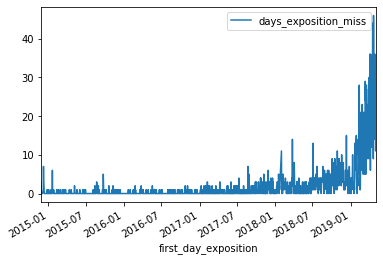

In [62]:
#создаём столбец, в который проставляется индикатор пропущенной строки
real_estate['days_exposition_miss'] = real_estate['days_exposition'].isna().astype(int)
#строим график по сумме пропусков в зависимости от даты подачи объявления
real_estate.groupby('first_day_exposition').agg({'days_exposition_miss': 'sum'}).plot()
plt.show()

Число пропусков растёт к концу периода. Возможно, что пропуски означают незакрытые объявления, вероятность попадания которых в базу увеличивается с приближением к последней дате.
Будем считать, что дата выгрузки равна последнему дню наблюдений.

In [63]:
print('Число пропусков до обработки:', real_estate['days_exposition'].isna().sum())
max_dat = real_estate['first_day_exposition'].max()
#заполняем пропуски с помощью метода loc, используя в качестве заполнителя разность
# даты подачи объявления и последней даты
real_estate.loc[real_estate['days_exposition'].isna(),
                'days_exposition'] = (max_dat - real_estate.loc[real_estate['days_exposition'].isna(), 'first_day_exposition']).dt.days
print('Число пропусков после обработки:', real_estate['days_exposition'].isna().sum())

Число пропусков до обработки: 3180
Число пропусков после обработки: 0


Мы заполнили пропуски по длительности нахождения объявления в базе. 

9) Рассмотрим пропуски по этажности.

In [64]:
real_estate[real_estate['floors_total'].isna()]['floor'].value_counts()

4     9
6     9
8     8
12    6
9     5
3     4
21    4
5     4
7     4
11    3
10    3
1     3
13    3
15    3
18    3
19    3
14    2
20    2
2     2
24    2
23    1
17    1
22    1
Name: floor, dtype: int64

Поскольку мы видим, что встречаются высокие этажи, нецелесообразно использовать медиану по населённому пункту. Пропущенные значения не оказывают существенного влияния на выборку, однако пропуски могут вызвать проблемы при категоризации данных по близости к верхним этажам. 
Поэтому считаем возможным принять этажи в пропущенных ячейках за максимальные этажи дома.

In [65]:
print('Число пропусков до обработки:', real_estate['floors_total'].isna().sum())
real_estate.loc[real_estate['floors_total'].isna(), 'floors_total'] = real_estate.loc[real_estate['floors_total'].isna(), 'floor']
print('Число пропусков после обработки:', real_estate['floors_total'].isna().sum())

Число пропусков до обработки: 85
Число пропусков после обработки: 0


Заполнение пропусков закончено. Переходим к окончательной обработке.

#### Изменение типов данных и окончательная обработка

In [66]:
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_rate,kitchen_rate,days_exposition_miss
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,0.616438,0.128767,1
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,12817.0,18603.0,0.0,399.5,0.0,584.5,81.0,0.463731,0.259067,0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.573864,0.160985,0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,98.013699,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.616438,0.128767,0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.573864,0.160985,0


В ходе предобработки было создано 3 лишних столбца ('living_rate', 'kitchen_rate', 'days_exposition_miss'), которые необходимо убрать.

In [67]:
real_estate = real_estate.drop(columns = ['living_rate', 'kitchen_rate', 'days_exposition_miss'])
real_estate.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,399.5,0.0,584.5,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [68]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null object
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           23650 non-null float64
ponds

Далее рассмотрим возможность изменения форматов для столбцов. Без потери точности можно установить следующие форматы:

- last_price, floors_total, balcony, parks_around3000, ponds_around3000 - int - точность в несколько знаков после запятой не повлияет на анализ данных, так как показатели представлены целыми числами
- 'studio' - bool - столбец заполнен логическими данными, поэтому необходим перевод его в bool для соответствия формата значениям

In [69]:
cols_to_int = ['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
real_estate[cols_to_int] = real_estate[cols_to_int].astype('int64')
real_estate['studio'] = real_estate['studio'].astype('bool')
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null float64
ponds_around300

Предварительная обработка данных завершена.

### Вывод <a id=info4></a>

В ходе предварительной обработки данных:

- заполнены 0 пропущенные значения столбца 'balcony'
- заменены на False пропуски в 'is_apartment'
- заполнены медианными значениями 'parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000', 'cityCenters_nearest', 'airports_nearest', 'ceiling_height'
- при помощи данных доли кухни и жилой зоны по помещениям схожего типа восстановлены пропуски в 'living_area' и 'kitchen_area'
- при помощи замены ё на е на удалось убрать 34 дубликата названий населённых пунктов
- исходя из предположения, что число дней в 'days_exposition' могло быть не проставлено из-за того, что объявления не были закрыты, были восстановлены пропуски как разница между наиболее поздней датой размещения объявления и фактической датой размещения
- 'floors_total' пропуски заполнены в соответствии с текущим указанным этажом
- поскольку восстановление пропусков в столбце 'locality_name' не представлялось возможным и общее количество пропусков было меньше статистически значимого количества (86), то данные строки было решено отбросить
- изменены форматы в столбцах  last_price, floors_total, balcony, parks_around3000, ponds_around3000, studio

### Шаг 3. Посчитайте и добавьте в таблицу <a id=info5></a>

В рамках анализа данных по рынку недвижимости соберём следующие данные:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры (варианты — первый, последний, другой)
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [70]:
#создание новых столбцов на основе арифметических действий со значениями существующих
real_estate['metre_price'] = round(real_estate['last_price']/real_estate['total_area'],2)
real_estate['living_rate'] = real_estate['living_area']/real_estate['total_area']
real_estate['kitchen_rate'] = real_estate['kitchen_area']/real_estate['total_area']
#создаём столбец, отражающий цену кв. м. в тыс. рублей
real_estate['metre_price_thousand'] = round(real_estate['metre_price']/1000 , 2)
real_estate.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,living_rate,kitchen_rate,metre_price_thousand
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,57.0,120370.37,0.472222,0.231481,120.37
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,18603.0,0,399.5,0,584.5,81.0,82920.79,0.460396,0.272277,82.92
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,0.612500,0.148214,92.79


Созданы следующие столбцы:
- 'metre_price' - цена квадратного метра в рублях
- 'metre_price_thousand' - цена квадратного метра в тысячах рублей
- 'living_rate' - доля жилого пространства в общей площади квартиры
- 'kitchen_area'- доля кухонного пространства в общей площади квартиры

Сформируем столбцы на основе даты подачи объявления - день недели, месяц и год публикации объявления.

In [71]:
real_estate['exposition_day'] = real_estate['first_day_exposition'].dt.weekday
real_estate['exposition_month'] = real_estate['first_day_exposition'].dt.month
real_estate['exposition_year'] = real_estate['first_day_exposition'].dt.year
real_estate[['first_day_exposition','exposition_day', 'exposition_month', 'exposition_year']].head(3)

,first_day_exposition,exposition_day,exposition_month,exposition_year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015


Новые столбцы со сведениями по дню недели, месяцу и году подачи объявления сформированы. ('exposition_day', 'exposition_month', 'exposition_year')
Подготовим группировку по этажности:

In [72]:
#создаём функцию, которая проверяет этаж квартиры и, если он не равен 1, проверяет совпадение с максимальным этажом
def floor_groop(row):
    floor = row['floor']
    max_floor = row['floors_total']
    try:
        if floor == 1:
            return 'Первый'
        elif floor == max_floor:
            return 'Последний'
        return 'Другой'
    except:
        return 'Ошибка'

In [73]:
real_estate['floor_group'] = real_estate.apply(floor_groop, axis = 1)
print(real_estate[['floor','floors_total', 'floor_group']].head(3))
print(real_estate['floor_group'].value_counts())

   floor  floors_total floor_group
0      8            16      Другой
1      1            11      Первый
2      4             5      Другой
Другой       17326
Последний     3412
Первый        2912
Name: floor_group, dtype: int64


### Вывод <a id=info6></a>

В DataFrame были добавлены следующие расчетные значения:

- 'metre_price' - цена квадратного метра в рублях
- 'metre_price_thousand' - цена квадратного метра в тысячах рублей
- 'living_rate' - доля жилого пространства в общей площади квартиры
- 'kitchen_area'- доля кухонного пространства в общей площади квартиры
- 'exposition_day', 'exposition_month', 'exposition_year' - день недели, месяц и год размещения объявления
- 'floor_group' - группировка по нахождению на определённом этаже - первом, последнем или ином

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a id=info7></a>

В рамках исследовательского анализа необходимо выполнить серию задач. 

1) Изучение следующих параметров: площадь, цена, число комнат, высота потолков. <a id=info8></a>

Создадим функцию, которая будет выводить информацию по необходимому нам столбцу. Помимо гистограммы по всем значениям создадим дополнительно вывод гистограммы с ограничением значений в q3+1.5*IQR для того, чтобы убрать редкие значения.

In [74]:
#объявляем функцию, которая принимает название столбца и имя оси для диаграммы
def short_analysis(frame_name,col, name):
    #вывод информации по столбцу
    print(frame_name[col].describe())
    print()
    print('Разброс значений без 2,5% с начала и конца выборки:')
    print('97,5% значений показателя', name, 'больше {:.2f}'.format(frame_name[col].quantile(0.025)))
    print('2,5% значений показателя', name, 'больше {:.2f}'.format(frame_name[col].quantile(0.975)))
    #создаём гистограмму по всем значениям
    frame_name[col].plot(kind = 'hist', bins = 100, figsize = (6,6), sharex = False)
    plt.xlabel(name)
    plt.show()
    # выводим ящик с усами
    frame_name.boxplot(column = col, figsize=(6,6))
    plt.title(name)
    plt.show()
    # делаем расчет квонтилей для того, чтобы ограничить вывод гистограммы 
    q1 = frame_name[col].quantile(0.25)
    q3 = frame_name[col].quantile(0.75)
    iqr = q3 - q1
    upper_range = q3+1.5*iqr
    if (q1-1.5*iqr)<0:
        low_range = 0
    else:
        low_range = q1-1.5*iqr
    #для отбора выбивающихся значений формируем гистограмму с ограничением - слева q1-1.5*iqr, справа q3+1.5*iqr
    frame_name[col].plot(kind = 'hist', bins = 100, range = (low_range,upper_range), figsize = (6,6), sharex = False)
    plt.xlabel(name)
    plt.show()
    #создаём переменную, которая принимает значения столбца фрейма
    column = frame_name[col]
    #создаём объект на основе запроса к основной таблице, где значения столбца находятся в промежутках
    #между нижней и верхней границей нашего отбора и определяем характеристики данной выборки
    real_query = frame_name.query('@low_range <= @column <= @upper_range')
    print('Характеристики показателя без редких значений:')
    print(real_query[col].describe())

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Разброс значений без 2,5% с начала и конца выборки:
97,5% значений показателя Площадь квартиры больше 29.00
2,5% значений показателя Площадь квартиры больше 148.91


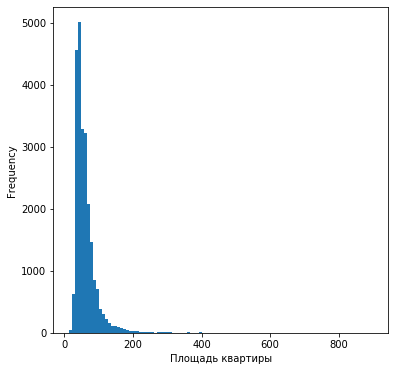

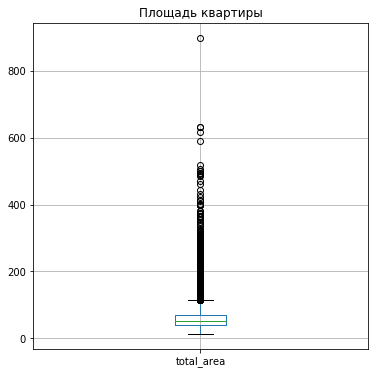

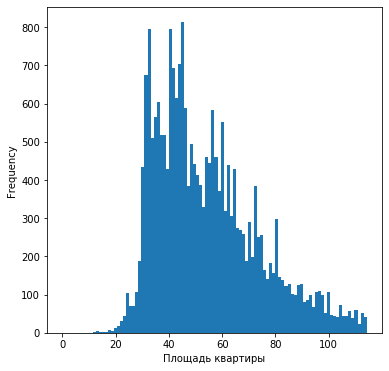

Характеристики показателя без редких значений:
count    22406.000000
mean        54.325685
std         19.349559
min         12.000000
25%         39.400000
50%         50.100000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64


In [75]:
short_analysis(real_estate,'total_area','Площадь квартиры')

Максимальная площадь квартиры в выборке - 900 кв. м., минимальная - 12 кв. м.
Большая часть квартир по площади не выходит за границы 120 кв. м. 97,5% квартир в выборке не превышают по площади 149 кв. м.
Медиана по площади квартир составила 52 кв. м., средняя площадь - 60.3 кв м.
Анализ графиков показывает, что жилой фонд тяготеет к сравнительно небольшим квартирам. Пиковые значения наблюдаются на площадях 30, 40-45 и 55 кв. м. 
Также имеется небольшой по количеству, но внушительный по площади люксовый сегмент, где площадь помещения начинается от 200 кв. м. и может доходить в экстремальных случаях до 900 кв. м.

Рассмотрим такой показатель как цена квартиры.

In [76]:
#создаём вспомогательную колонку "Цена квартиры в тыс. руб."
real_estate['last_price_thousand'] = round(real_estate['last_price']/1000, 0)

count     23650.00000
mean       6541.12685
std       10896.39876
min          12.00000
25%        3400.00000
50%        4650.00000
75%        6799.00000
max      763000.00000
Name: last_price_thousand, dtype: float64

Разброс значений без 2,5% с начала и конца выборки:
97,5% значений показателя Цена квартиры, тыс. руб. больше 1442.25
2,5% значений показателя Цена квартиры, тыс. руб. больше 22380.87


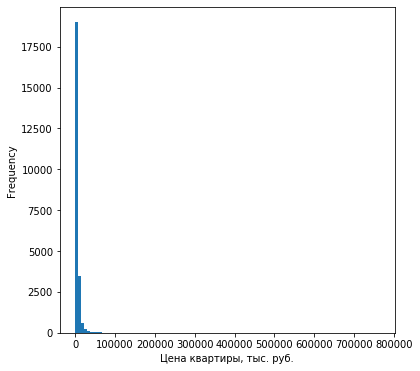

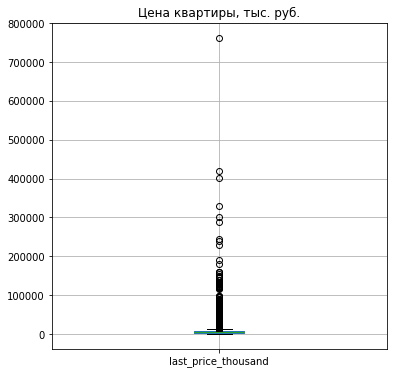

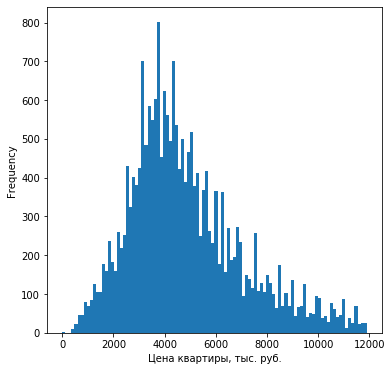

Характеристики показателя без редких значений:
count    21595.000000
mean      4838.941977
std       2217.282274
min         12.000000
25%       3300.000000
50%       4400.000000
75%       6000.000000
max      11894.000000
Name: last_price_thousand, dtype: float64


In [77]:
short_analysis(real_estate, 'last_price_thousand','Цена квартиры, тыс. руб.')

Основная доля цен на квартиры на рассматриваемой территории сосредоточена в пределах от 2 млн. до 9 млн. руб. 
При этом заметно, что часть квартир настолько сильно выбивается из общей тенденции, что существенно влияет на среднее (на 2 млн. больше медианного значения).
В целом рынок тяготеет к умеренной цене на квартиры, однако здесь также можно выделить люксовый сегмент с ценами от 12 до 22 млн. Отметим также экстремально дорогую квартиру стоимостью 763 млн. руб.

Рассмотрим статистику по числу комнат:

count    23650.000000
mean         2.078436
std          1.066393
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Разброс значений без 2,5% с начала и конца выборки:
97,5% значений показателя Число комнат больше 1.00
2,5% значений показателя Число комнат больше 4.00


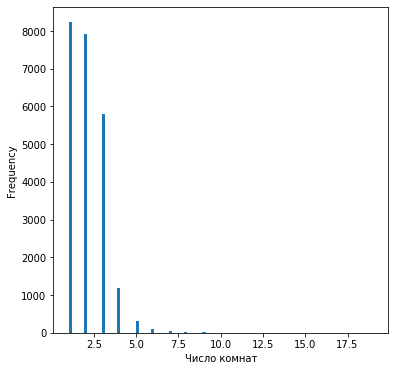

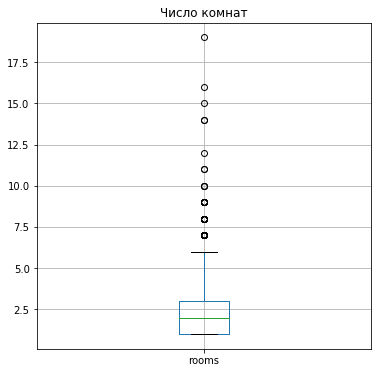

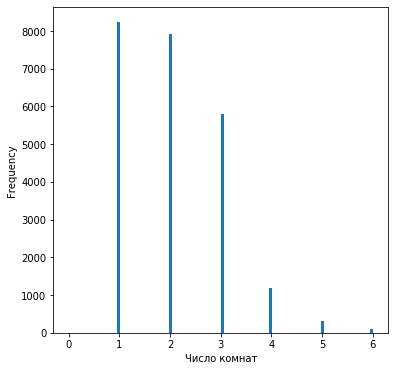

Характеристики показателя без редких значений:
count    23560.000000
mean         2.055688
std          0.993868
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


In [78]:
short_analysis(real_estate,'rooms','Число комнат')

Распределение по числу комнат показывает, что основную долю на рынке составляют 1-4-комнатные квартиры, что соответствует стандартным характеристикам жилья по стране.
При этом мы опять квартиры с бОльшим количеством комнат являются практически единичными, а наиболее типичной является двухкомнатная квартира.

Рассмотрим такой параметр, как высота потолков:

count    23650.000000
mean         2.732198
std          1.002603
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Разброс значений без 2,5% с начала и конца выборки:
97,5% значений показателя Высота потолков, м. больше 2.50
2,5% значений показателя Высота потолков, м. больше 3.35


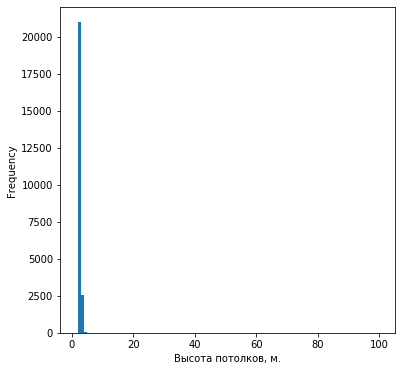

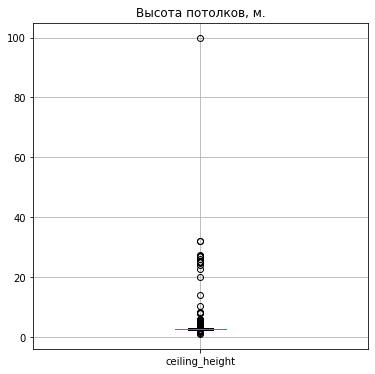

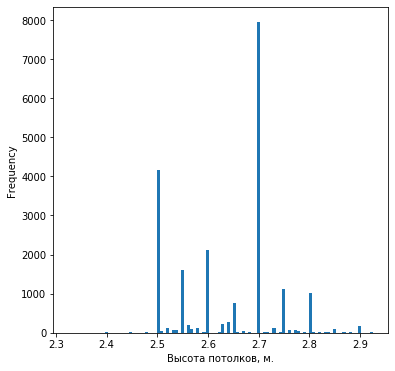

Характеристики показателя без редких значений:
count    20913.000000
mean         2.640292
std          0.097754
min          2.340000
25%          2.550000
50%          2.700000
75%          2.700000
max          2.920000
Name: ceiling_height, dtype: float64


In [79]:
short_analysis(real_estate, 'ceiling_height','Высота потолков, м.')

Минимально допустимая высота потолков в России - 2,4 м. В рассматриваемой выборке наиболее распространёнными являются две высоты: 2,5м. и 2,7м (наиболее частая высота потолков). 
На диаграмме разброса можно отметить 2 зоны: группа у высоты 2,7 м. и группа у высоты 3,5 м. Последняя может соответствовать либо более новому жилью, либо более дорогому.
Также опять возникает экстремальное значение высоты потолка, явно относящееся к сверхдорогому помещению площадью 900 кв.м.

#### Задание 1, итог.

Типичная квартира, характерная для рассматриваемой выборки, будет иметь следующие характеристики: 
- 2 комнаты
- площадь около 50 кв. м.
- потолки высотой 2,7 м.
- стоимость 4,8 млн. руб.

2) Оценка времени продажи квартиры.
Рассмотрим срок продажи квартиры при помощи ранее созданной функции. <a id=info9></a>

count    23650.000000
mean       185.714419
std        233.455771
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

Разброс значений без 2,5% с начала и конца выборки:
97,5% значений показателя Срок продажи квартиры, д. больше 5.00
2,5% значений показателя Срок продажи квартиры, д. больше 884.00


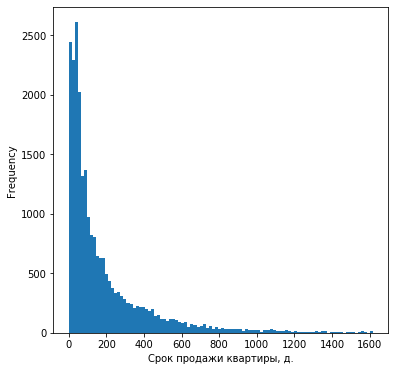

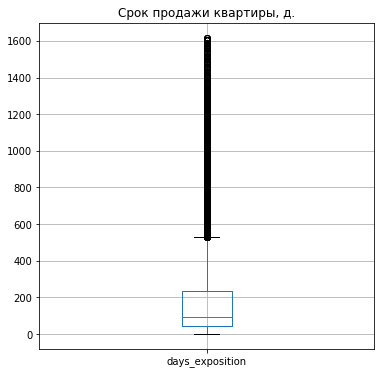

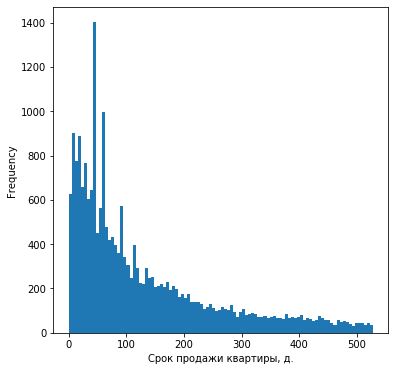

Характеристики показателя без редких значений:
count    21700.000000
mean       129.824562
std        125.318301
min          0.000000
25%         38.000000
50%         83.000000
75%        186.000000
max        528.000000
Name: days_exposition, dtype: float64


In [80]:
short_analysis(real_estate, 'days_exposition','Срок продажи квартиры, д.')

Рассмотрим сроки продажи на более узком диапазоне, чтобы ближе рассмотреть пиковые значения.

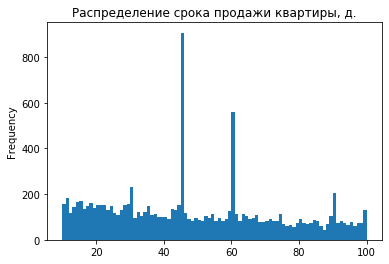

In [81]:
days_limited = real_estate.query('10 <= days_exposition <= 100')
days_limited['days_exposition'].plot(kind = 'hist', bins = 90)
plt.title('Распределение срока продажи квартиры, д.')
plt.show()

#### Итог задания 2.

Средний срок реализации квартиры составляет 186 дней, половина квартир была реализования за 94 дня. Абсолютное большинство квартир не находится в базе больше полутора лет. 

При этом срок продажи 10% квартир - 2 года и дольше.

Если рассматривать более узкий диапазон, то заметны пики по реализациям квартир за 45 дней и за 60 дней. 

Таким образом, велика вероятность реализовать квартиру за 1,5-2 месяца.

Можно считать, что квартира продана необычно быстро, если удалось реализовать её менее, чем за 5 дней, а необычно долго - свыше 528 дней.

3) Изучение факторов, влияющих на стоимость квартиры. <a id=info10></a>

Рассмотрим влияние следующих факторов на цену квартиры: площадь, количество комнат, этаж, день, месяц и год размещения

In [82]:
#Формируем пул показателей, по которым будем искать корреляцию
real_estate_part = real_estate[['last_price_thousand', 'total_area',
                                'rooms', 'floor', 'exposition_day', 'exposition_month', 'exposition_year']]


In [83]:
real_estate_part.corr().head(1)

,last_price_thousand,total_area,rooms,floor,exposition_day,exposition_month,exposition_year
last_price_thousand,1.0,0.653743,0.365291,0.02677,0.001607,0.002741,-0.042927


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb25516f690>,
      dtype=object)

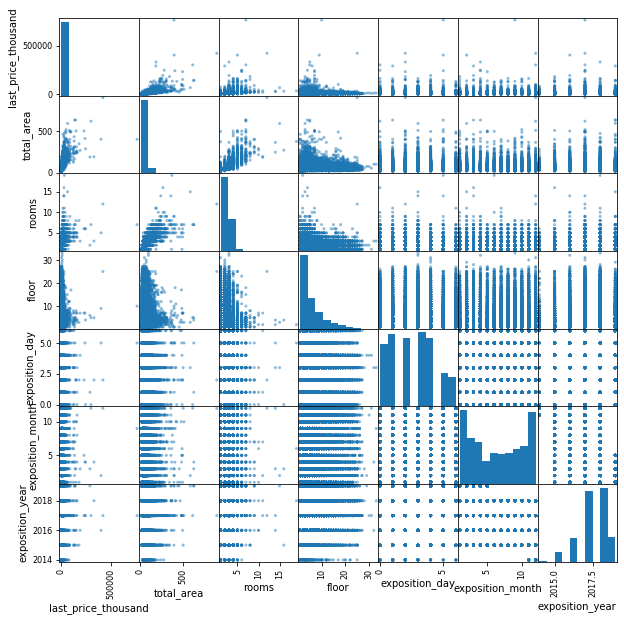

In [84]:
pd.plotting.scatter_matrix(real_estate_part, figsize = (10,10))

In [85]:
print(real_estate.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'metre_price', 'living_rate',
       'kitchen_rate', 'metre_price_thousand', 'exposition_day',
       'exposition_month', 'exposition_year', 'floor_group',
       'last_price_thousand'],
      dtype='object')


In [86]:
grouped_by_floor = real_estate.groupby('floor_group').agg({'last_price_thousand': ['mean', 'median']})
grouped_by_floor

last_price_thousand        
                           mean  median
floor_group                            
Другой              6674.348667  4848.5
Первый              4800.466003  3900.0
Последний           7350.213365  4350.0

#### Задание 3. Итог.

Из расчетов корреляции видно, что цена квартиры больше всего связана с площадью. Корреляция с количеством комнат частичная.
День, месяц и год размещения на цену не повлияли.
Этаж частично влияет на стоимость: в среднем квартиры на первом этаже дешевле остальных.

4) Анализ объявлений по 10 наиболее популярным населённым пунктам <a id=info11></a>

Определим населённые пункты с наибольшим количеством объявлений и выявим среднюю цену квадратного метра в них.

In [87]:
#производится выборка 10 названий локаций по наибольшей частоте упоминания
top_10 = real_estate['locality_name'].value_counts().sort_values(ascending = False).head(10)
#формирование сводной таблицы с группировкой по названию населённого пункта
top_10
top_10_prices = (real_estate
                .query('locality_name in @top_10.index')
                .pivot_table(index = 'locality_name', values = 'metre_price_thousand', aggfunc = 'mean' )
                .sort_values('metre_price_thousand', ascending = False)
                )
top_10_prices


,metre_price_thousand
locality_name,
Санкт-Петербург,114.849013
Пушкин,103.125854
деревня Кудрово,92.473712
поселок Парголово,90.176177
поселок Мурино,85.681817
поселок Шушары,78.677614
Колпино,75.424467
Гатчина,68.746319
Всеволожск,68.654447


#### Задание 4. Итог. <a id='task4'></a>

Исследованы 10 населённых пунктов с максимальным количеством объявлений. 

- Наибольшая цена кв. метра зафиксирована в Санкт-Петербурге - 114,8 тыс.руб.
- Наименьшая цена кв. метра зафиксирована в г. Выборг - 58,1 тыс. руб.

5) Определение центральной зоны в г. Санкт-Петербург <a id=info12></a>

Построим график зависимости цены квадратного метра от расстояния до центра, ограничив выборку городом Санкт-Петербург.

In [88]:
#Создаём базу только из значений по г. Санкт-Петербург
spb_local_base = real_estate.query('locality_name == "Санкт-Петербург"')
spb_local_base.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,metre_price,living_rate,kitchen_rate,metre_price_thousand,exposition_day,exposition_month,exposition_year,floor_group,last_price_thousand
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,57.0,120370.37,0.472222,0.231481,120.37,3,3,2019,Другой,13000.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,False,...,558.0,92785.71,0.612500,0.148214,92.79,3,8,2015,Другой,5196.0
3,0,64900000,159.0,2015-07-24,3,2.70,14,98.013699,9,False,...,424.0,408176.10,0.616438,0.128767,408.18,4,7,2015,Другой,64900.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,121.0,100000.00,0.320000,0.410000,100.00,1,6,2018,Другой,10000.0
7,5,7915000,71.6,2019-04-18,2,2.70,24,38.940351,22,False,...,15.0,110544.69,0.543860,0.263966,110.54,3,4,2019,Другой,7915.0


In [89]:
import warnings
warnings.filterwarnings('ignore')

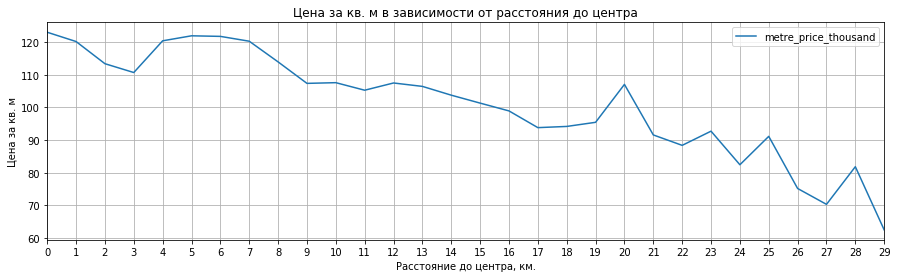

In [90]:
#создаём доп. столбец, показывающий дальность от центра в км.
spb_local_base['centre_dist_km'] = spb_local_base['cityCenters_nearest']/1000
spb_local_base['centre_dist_km'] = spb_local_base['centre_dist_km'].astype('int64')
#задаём лимит в Q3+IQR*1.5 для отсечения экстремально высоких цен на квартиры
spb_q1 = spb_local_base['last_price'].quantile(0.25)
spb_q3 = spb_local_base['last_price'].quantile(0.75)
upper_limit = spb_q3+(spb_q3-spb_q1)*1.5
#создаём сводную таблицу со средней ценой, сгруппированной по дальности от центра
spb_query = (spb_local_base
 .query('last_price < @upper_limit')
 .pivot_table(index = 'centre_dist_km', values = 'metre_price_thousand', aggfunc = 'mean'))
#формируем линейный график зависимости средней цены метра от дальности от центра
spb_query.plot(kind = 'line', figsize = (15,4), y = 'metre_price_thousand', grid = True)
plt.xlabel('Расстояние до центра, км.')
plt.ylabel('Цена за кв. м')
plt.title('Цена за кв. м в зависимости от расстояния до центра')
plt.xticks(spb_query.index.values) #разметка по оси х в соответствии с индексом таблицы
plt.show()

Резкое снижение цены можно наблюдать в двух точках:

- 2 км. от центра
- 8 км. от центра

Анализ внешних источников показал, что в г. Санкт-Петербург существует т.н. "серый пояс" - промышленные районы в центре города. Соответственно, для нашего анализа более подойдёт значение в 8 км. 

#### Задание 5. Итог. <a id='task5_s'></a>

После анализа распределения цены за кв. м. в зависимости от удалённости от центра города было выявлено, что центр в г. Санкт-Петербург ограничен радиусом **8км**.

6) Исследуем квартиры в центре г. Санкт-Петербург и их отличия от квартир по городу в целом <a id=info13></a>

Для исследования выберем следующие показатели:

- площаль квартиры
- цена за кв. м.
- количество комнат
- высота потолков

In [91]:
#создаётся столбец, показывающий, находится ли квартира в центре города (радиус 8км.)
spb_local_base['is_centre'] = spb_local_base['centre_dist_km'] <= 8

In [92]:
#создадим функцию, которая будет рисовать графики и давать характеристику выборке, ограниченной от выбросов
def quantile_hist(frame_name, frame_col, column_name, name): #принимает название фрейма, фрейм+колонка
    #название колонки, название показателя для отражения названия
    q1 = frame_col.quantile(0.25)
    q3 = frame_col.quantile(0.75)
    iqr = q3 - q1
    upper_range = q3+1.5*iqr
    if (q1-1.5*iqr)<0:
        low_range = 0
    else:
        low_range = q1-1.5*iqr
    #для отбора выбивающихся значений формируем гистограмму с ограничением - слева q1-1.5*iqr, справа q3+1.5*iqr
    real_query = frame_name.query('@low_range <= @frame_col <= @upper_range')
    print('Характеристики показателя без редких значений:')
    print(real_query[column_name].describe())
    #выводим гистограмму
    frame_col.plot(kind = 'hist', bins = 100, range = (low_range,upper_range)
                         , figsize = (6,6), sharex = False, grid = True)
    plt.title('Распределение без редких значений:')
    plt.xlabel(name)
    plt.show()
    

In [93]:
#объявляем функцию для сравнительного анализа ценра и всего города,
#которая принимает название столбца и имя оси для диаграммы
def centre_compare(frame_name,col, name): 
    frame_plot = frame_name #переменная для внутренней функции
    value_name = name #переменная для внутренней функции
    column_all = frame_name[col] 
    center = frame_name.query('is_centre == True') #фрейм для передачи в функцию
    column_center = center[col]
    column_name = col #переменная для внутренней функции
    #вывод информации по столбцу
    print('Характеристика помещений в центре по показателю', name)
    print(column_center.describe())
    print()
    print('Характеристика помещений в целом по городу по показателю', name)
    print(column_all.describe())
    print()
    print('Разброс значений без 2,5% с начала и конца выборки:')
    print('В центре города -')
    print('97,5% значений показателя', name, 'больше {:.2f}'.format(column_center.quantile(0.025)))
    print('2,5% значений показателя', name, 'больше {:.2f}'.format(column_center.quantile(0.975)))
    print()                                                               
    print('В городе в целом -')
    print('97,5% значений показателя', name, 'больше {:.2f}'.format(column_all.quantile(0.025)))
    print('2,5% значений показателя', name, 'больше {:.2f}'.format(column_all.quantile(0.975)))
    #создаём гистограмму по всем значениям
    column_center.plot(kind = 'hist', bins = 100, figsize = (6,6), sharex = False)
    plt.title('Распределение по центру города:')
    plt.xlabel(name)
    plt.show()
    column_all.plot(kind = 'hist', bins = 100, figsize = (6,6), sharex = False)
    plt.title('Распределение по городу в целом:')
    plt.xlabel(name)
    plt.show()
    #Выводим характеристики по обрезанным значениям, вызывая ранее созданную функцию
    print('Цетр города')
    quantile_hist(center, column_center,column_name,value_name)
    print('Город в целом')
    quantile_hist(frame_plot, column_all,column_name,value_name)
    print()
    q1 = column_all.quantile(0.25)
    q3 = column_all.quantile(0.75)
    iqr = q3 - q1
    upper_range = q3+1.5*iqr
    if (q1-1.5*iqr)<0:
        low_range = 0
    else:
        low_range = q1-1.5*iqr
    #для отбора выбивающихся значений формируем гистограмму с ограничением - слева q1-1.5*iqr, справа q3+1.5*iqr
    comparison_hist = (frame_name
                       .query('@low_range <= @column_all <= @upper_range')
                       .pivot_table(index = 'is_centre', values = col, aggfunc = 'mean')
                      )#формируем сводную таблицу с группировкой по факту нахождения в центре
    comparison_hist.plot(kind = 'bar',figsize = (4,4), grid = True)
    plt.title('Сравнение средних данных по центру и городу')
    plt.xlabel(name)
    plt.xticks(comparison_hist.index.values)
    plt.show()

Характеристика помещений в центре по показателю Площадь помещения, кв. м.
count    4382.000000
mean       88.570032
std        57.929565
min        12.000000
25%        53.225000
50%        75.000000
75%       104.840000
max       900.000000
Name: total_area, dtype: float64

Характеристика помещений в целом по городу по показателю Площадь помещения, кв. м.
count    15721.000000
mean        64.751488
std         40.417095
min         12.000000
25%         42.000000
50%         55.000000
75%         74.600000
max        900.000000
Name: total_area, dtype: float64

Разброс значений без 2,5% с начала и конца выборки:
В центре города -
97,5% значений показателя Площадь помещения, кв. м. больше 31.00
2,5% значений показателя Площадь помещения, кв. м. больше 237.38

В городе в целом -
97,5% значений показателя Площадь помещения, кв. м. больше 30.00
2,5% значений показателя Площадь помещения, кв. м. больше 165.00


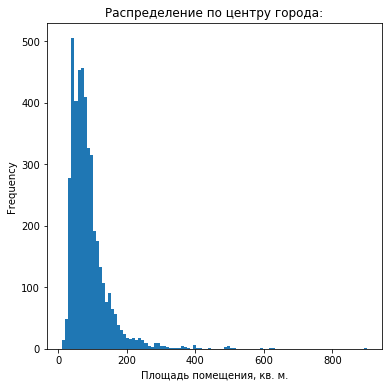

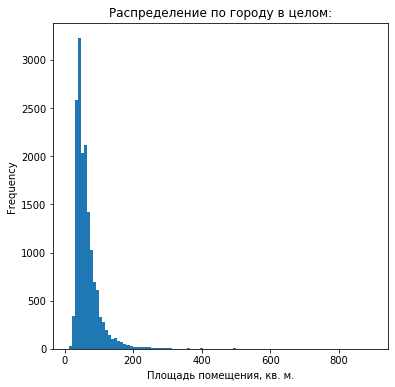

Цетр города
Характеристики показателя без редких значений:
count    4151.000000
mean       78.751816
std        34.494829
min        12.000000
25%        52.000000
50%        72.000000
75%        98.000000
max       182.000000
Name: total_area, dtype: float64


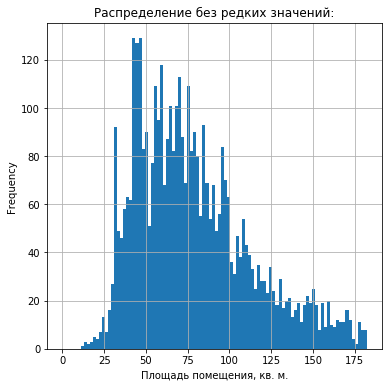

Город в целом
Характеристики показателя без редких значений:
count    14807.000000
mean        57.478661
std         21.626563
min         12.000000
25%         41.000000
50%         53.000000
75%         70.000000
max        123.300000
Name: total_area, dtype: float64


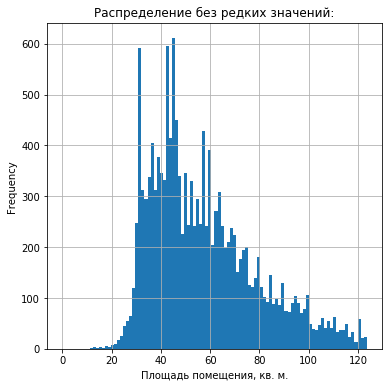

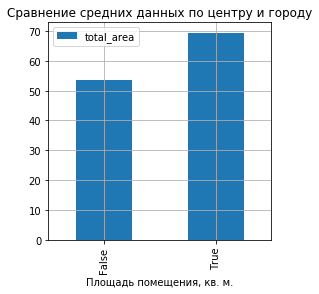

In [94]:
centre_compare(spb_local_base, 'total_area', 'Площадь помещения, кв. м.')

В центре города площади квартир в среднем больше на 20 кв. м. Если в целом по городу большинство квартир укладываются в площадь до 125 кв. м., то в центре планка установлена на уровне 175 кв. м.

Характеристика помещений в центре по показателю Цена за кв. м., тыс. руб.
count    4382.000000
mean      140.762262
std        86.195282
min        15.350000
25%        99.602500
50%       122.220000
75%       152.067500
max      1907.500000
Name: metre_price_thousand, dtype: float64

Характеристика помещений в целом по городу по показателю Цена за кв. м., тыс. руб.
count    15721.000000
mean       114.849013
std         52.584456
min          0.110000
25%         90.910000
50%        104.760000
75%        124.440000
max       1907.500000
Name: metre_price_thousand, dtype: float64

Разброс значений без 2,5% с начала и конца выборки:
В центре города -
97,5% значений показателя Цена за кв. м., тыс. руб. больше 74.38
2,5% значений показателя Цена за кв. м., тыс. руб. больше 345.09

В городе в целом -
97,5% значений показателя Цена за кв. м., тыс. руб. больше 70.43
2,5% значений показателя Цена за кв. м., тыс. руб. больше 219.11


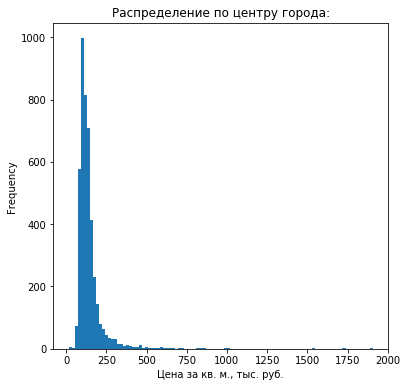

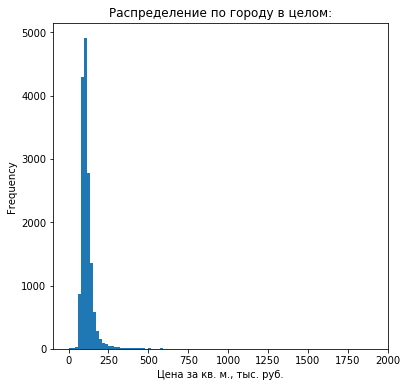

Цетр города
Характеристики показателя без редких значений:
count    4067.000000
mean      123.887885
std        34.096461
min        26.250000
25%        98.055000
50%       118.640000
75%       143.445000
max       230.550000
Name: metre_price_thousand, dtype: float64


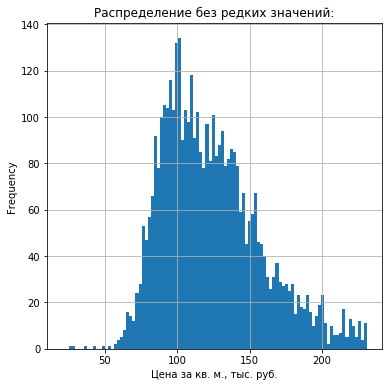

Город в целом
Характеристики показателя без редких значений:
count    14876.000000
mean       106.721981
std         22.730409
min         41.030000
25%         90.247500
50%        103.105000
75%        120.392500
max        174.680000
Name: metre_price_thousand, dtype: float64


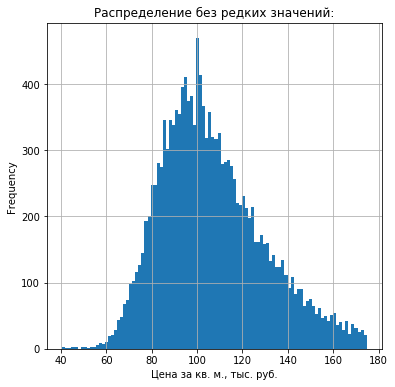

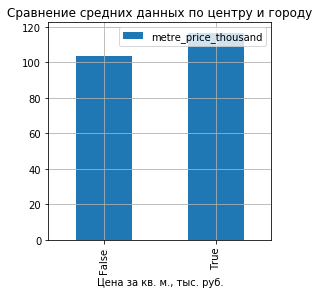

In [95]:
centre_compare(spb_local_base, 'metre_price_thousand', 'Цена за кв. м., тыс. руб.')

Цена квадратного метра в центре в среднем на 20 тыс. руб. выше, чем в среднем по городу.

Характеристика помещений в центре по показателю Количество комнат
count    4382.000000
mean        2.726152
std         1.402006
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

Характеристика помещений в целом по городу по показателю Количество комнат
count    15721.000000
mean         2.178615
std          1.137842
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Разброс значений без 2,5% с начала и конца выборки:
В центре города -
97,5% значений показателя Количество комнат больше 1.00
2,5% значений показателя Количество комнат больше 6.00

В городе в целом -
97,5% значений показателя Количество комнат больше 1.00
2,5% значений показателя Количество комнат больше 5.00


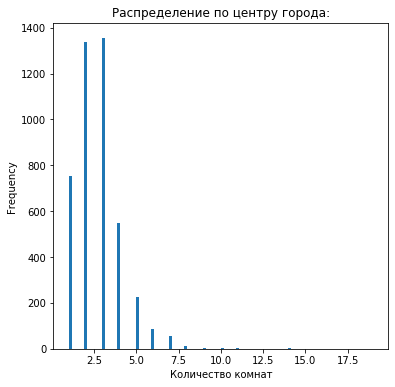

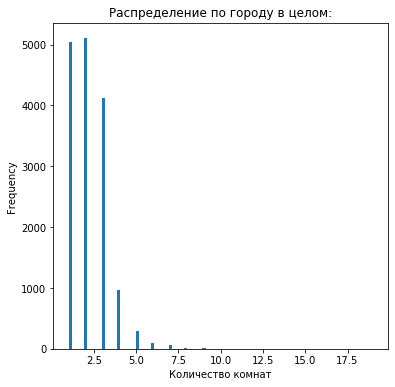

Цетр города
Характеристики показателя без редких значений:
count    3993.000000
mean        2.424242
std         0.946639
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: rooms, dtype: float64


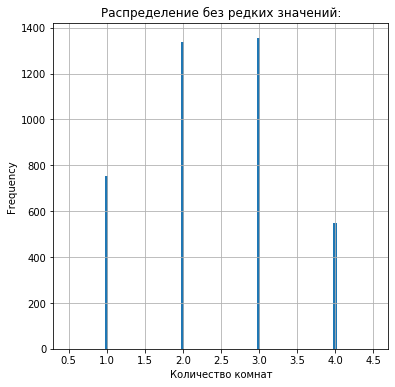

Город в целом
Характеристики показателя без редких значений:
count    15634.000000
mean         2.145900
std          1.040109
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


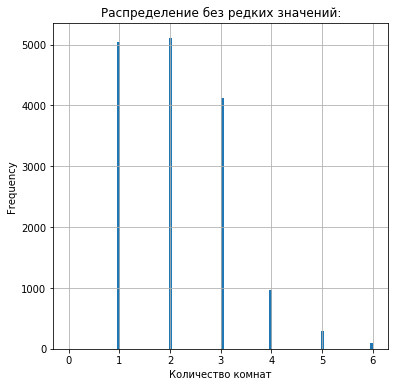

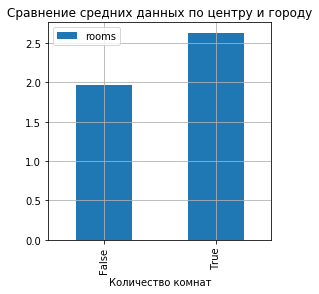

In [96]:
centre_compare(spb_local_base, 'rooms', 'Количество комнат')

В среднем в квартирах в центре больше комнат, чем в среднем по городу (2,4 против 2,1). Т.е. застройка в центре предполагает, помимо бОльшей площади, еще и большее количество комнат.

Характеристика помещений в центре по показателю Высота потолков, м.
count    4382.000000
mean        2.968444
std         1.674960
min         2.000000
25%         2.700000
50%         2.755000
75%         3.100000
max       100.000000
Name: ceiling_height, dtype: float64

Характеристика помещений в целом по городу по показателю Высота потолков, м.
count    15721.000000
mean         2.766655
std          1.040890
min          1.000000
25%          2.600000
50%          2.700000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Разброс значений без 2,5% с начала и конца выборки:
В центре города -
97,5% значений показателя Высота потолков, м. больше 2.50
2,5% значений показателя Высота потолков, м. больше 3.80

В городе в целом -
97,5% значений показателя Высота потолков, м. больше 2.50
2,5% значений показателя Высота потолков, м. больше 3.46


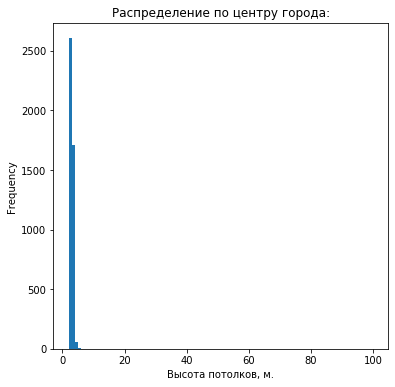

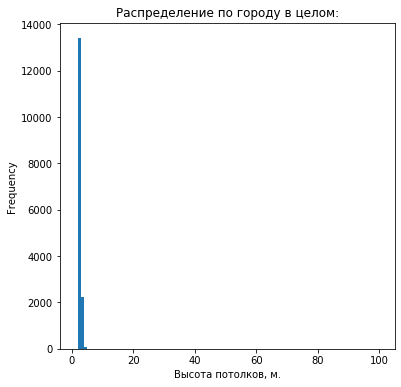

Цетр города
Характеристики показателя без редких значений:
count    4253.000000
mean        2.890705
std         0.275642
min         2.400000
25%         2.700000
50%         2.750000
75%         3.050000
max         3.700000
Name: ceiling_height, dtype: float64


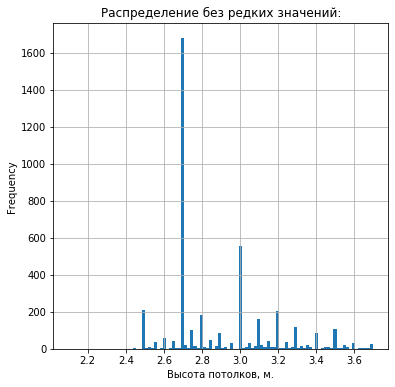

Город в целом
Характеристики показателя без редких значений:
count    13401.000000
mean         2.660640
std          0.095697
min          2.400000
25%          2.600000
50%          2.700000
75%          2.700000
max          2.970000
Name: ceiling_height, dtype: float64


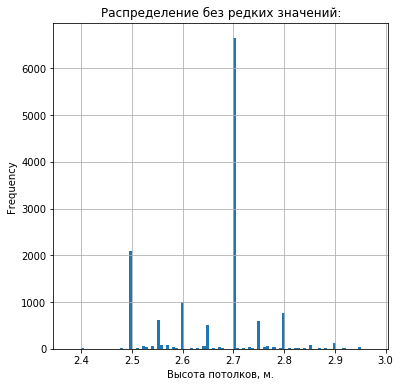

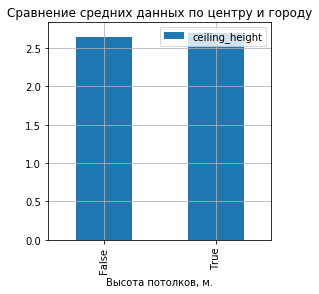

In [97]:
centre_compare(spb_local_base, 'ceiling_height', 'Высота потолков, м.')

Высота потолков квартир в центре в среднем больше на 20см.

In [98]:
spb_local_base.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'metre_price', 'living_rate',
       'kitchen_rate', 'metre_price_thousand', 'exposition_day',
       'exposition_month', 'exposition_year', 'floor_group',
       'last_price_thousand', 'centre_dist_km', 'is_centre'],
      dtype='object')

In [99]:
spb_correl = spb_local_base[['last_price_thousand','metre_price_thousand'
                             , 'rooms', 'floor', 'is_centre', 'centre_dist_km', 'total_area', 'exposition_day',
                             'exposition_month', 'exposition_year']]
spb_correl.query('is_centre == True').corr().head(2)

,last_price_thousand,metre_price_thousand,rooms,floor,is_centre,centre_dist_km,total_area,exposition_day,exposition_month,exposition_year
last_price_thousand,1.000000,0.776957,0.346149,0.10671,NaN,-0.103059,0.641044,0.019745,-0.003130,-0.048970
metre_price_thousand,0.776957,1.000000,0.020698,0.11174,NaN,-0.087447,0.260698,0.008627,-0.013912,0.002247


In [100]:
spb_correl.corr().head(2)

,last_price_thousand,metre_price_thousand,rooms,floor,is_centre,centre_dist_km,total_area,exposition_day,exposition_month,exposition_year
last_price_thousand,1.000000,0.761204,0.373893,-0.000838,0.272603,-0.257900,0.657188,0.006153,0.000027,-0.044591
metre_price_thousand,0.761204,1.000000,0.044575,0.046002,0.306357,-0.310444,0.294499,0.003012,-0.010934,0.024722


Исследование взаимосвязей показывает, что наибольшее влияние на стоимость квартиры оказывает её площадь. 
На стоимость квартиры в целом по городу влияет расстояние до центра, однако внутри 8км. радиуса этот фактор практически перестаёт оказывать какое-либо влияние.

Второй по значимости показатель - число комнат. Его влияние одинаково в центральных районах и по городу в целом.

Внутри центральной зоны наблюдается определённая зависимость цены квартиры от этажа, которая пропадает на общей выборке.

Время размещения объявления не оказывает на цену никакого влияния.

Квартиры г. Санкт-Петербург можно охарактеризовать следующим образом:

- средняя площадь - 57,5 кв. м.
- средняя цена за кв. м. - 106 тыс. руб.
- средняя высота потолков - 2,7 м.
- среднее количество комнат - 2,1

Квартиры в центре характеризуются следующими параметрами:

- средняя площадь - 78,7 кв. м.
- средняя цена за кв. м. - 124 тыс. руб.
- средняя высота потолков - 2,9 м.
- среднее количество комнат - 2,4

### Шаг 5. Общий вывод <a id=info14></a>

В ходе исследования был проанализирован рынок недвижимости г. Санкт-Петербург и соседних с ним населённых пунктах.

Типичная квартира по рассматриваемой зоне обладает следующими характеристиками:

- количество комнат - 2
- площадь - 54,3 кв. м.
- высота потолков -  2,64 м.
- средняя стоимость - 4,8 млн. руб.

Квартиры г. Санкт-Петербург можно охарактеризовать следующим образом:

- средняя площадь - 57,5 кв. м.
- средняя цена за кв. м. - 106 тыс. руб.
- средняя высота потолков - 2,7 м.
- среднее количество комнат - 2,1

Квартиры в центре города характеризуются следующими параметрами:

- средняя площадь - 78,7 кв. м.
- средняя цена за кв. м. - 124 тыс. руб.
- средняя высота потолков - 2,9 м.
- среднее количество комнат - 2,4

Средний срок реализации квартиры составляет 186 дней, половина квартир была реализования за 94 дня. Абсолютное большинство квартир не находится в базе больше полутора лет. 

На стоимость квартиры наибольшее влияние оказывает **площадь**, на втором месте - **количество комнат**. Для квартир. находящихся за пределами центра г. Санкт-Петербург, существенным фактором является **близость к центру** (радиус 8км.). Внутри этого радиуса заметной связи с близостью к центру не выявлено. **Этаж** оказывает частичное влияние - квартиры на 1 этаже более дешевые, чем остальные.
Связь стоимости квартиры и даты размещения не обнаружена. 
